In [33]:
import gmaps
from api_keys import gkey
import gmaps.geojson_geometries
import requests
import json
from matplotlib.cm import Wistia
from matplotlib.colors import to_hex
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from numpy.polynomial.polynomial import polyfit

gmaps.configure(api_key=gkey)

In [6]:
pricing = pd.read_csv('../data/rawdata/average_data.csv')
print(len(pricing.index))
pricing.head()

,zip,estimate,house area,lot area,high,low,month value change,property tax,LAT,LNG
0,77003,304618.520,1728.452716,3171.167339,329690.960,281187.204,745.221328,2.456000e+05,29.749778,-95.345885
1,77004,332700.348,2040.959839,6091.640562,365302.716,302881.670,-647.458918,2.551451e+05,29.724893,-95.363752
2,77005,1185270.596,3363.540000,7277.734406,1282708.420,1099375.018,10074.394790,1.194511e+06,29.718435,-95.423555
3,77006,642616.528,2387.026104,4935.989518,702146.308,591382.956,3892.106212,5.803662e+05,29.740970,-95.391301
4,77007,528380.128,2360.635271,3457.987854,568855.332,490881.380,-1220.452906,5.022877e+05,29.771545,-95.411083


In [4]:
flood = pd.read_csv('../data/rawdata/flooding_insurance_by_zip.csv')
flood.head()

,StateCode,CountyName,PostalCode,Locations,Building_TIV,Contents_TIV,Building_Limit,Contents_Limit
0,TX,Harris,77002,157,1.146599e+09,1.390003e+08,122273700,29113200
1,TX,Harris,77003,287,2.175743e+08,2.843671e+07,63492400,30093900
2,TX,Harris,77004,1052,8.208479e+08,7.126165e+07,335596500,92368400
3,TX,Harris,77005,4043,4.296319e+09,4.542693e+08,988278400,380594300
4,TX,Harris,77006,1318,7.685005e+08,8.814417e+07,314864400,127083900


In [7]:
flood = flood[flood["PostalCode"].isin(list(pricing["zip"]))]
flood = flood.reset_index(drop=True)
print(len(flood))
flood.head()

127


,StateCode,CountyName,PostalCode,Locations,Building_TIV,Contents_TIV,Building_Limit,Contents_Limit
0,TX,Harris,77003,287,2.175743e+08,2.843671e+07,63492400,30093900
1,TX,Harris,77004,1052,8.208479e+08,7.126165e+07,335596500,92368400
2,TX,Harris,77005,4043,4.296319e+09,4.542693e+08,988278400,380594300
3,TX,Harris,77006,1318,7.685005e+08,8.814417e+07,314864400,127083900
4,TX,Harris,77007,2824,1.550757e+09,1.644996e+08,675585400,257149700


In [9]:
pricing = pricing[pricing["zip"].isin(list(flood["PostalCode"]))]
pricing = pricing.reset_index(drop=True)
print(len(pricing))
pricing.head()

127


,zip,estimate,house area,lot area,high,low,month value change,property tax,LAT,LNG
0,77003,304618.520,1728.452716,3171.167339,329690.960,281187.204,745.221328,2.456000e+05,29.749778,-95.345885
1,77004,332700.348,2040.959839,6091.640562,365302.716,302881.670,-647.458918,2.551451e+05,29.724893,-95.363752
2,77005,1185270.596,3363.540000,7277.734406,1282708.420,1099375.018,10074.394790,1.194511e+06,29.718435,-95.423555
3,77006,642616.528,2387.026104,4935.989518,702146.308,591382.956,3892.106212,5.803662e+05,29.740970,-95.391301
4,77007,528380.128,2360.635271,3457.987854,568855.332,490881.380,-1220.452906,5.022877e+05,29.771545,-95.411083


In [16]:
tot = pd.merge(pricing, flood,left_on="zip",right_on="PostalCode")
tot = tot.drop(["PostalCode","high","low","property tax","StateCode","CountyName","Building_TIV","Contents_TIV","Building_Limit","Contents_Limit"],axis=1)
tot.head()

,zip,estimate,house area,lot area,month value change,LAT,LNG,Locations
0,77003,304618.520,1728.452716,3171.167339,745.221328,29.749778,-95.345885,287
1,77004,332700.348,2040.959839,6091.640562,-647.458918,29.724893,-95.363752,1052
2,77005,1185270.596,3363.540000,7277.734406,10074.394790,29.718435,-95.423555,4043
3,77006,642616.528,2387.026104,4935.989518,3892.106212,29.740970,-95.391301,1318
4,77007,528380.128,2360.635271,3457.987854,-1220.452906,29.771545,-95.411083,2824


In [17]:
building_numbers = pd.read_csv("../data/rawdata/Total_Addresses_Without_Apartments.csv", header = None)
building_numbers = building_numbers[building_numbers[0].isin(list(tot["zip"]))]
building_numbers = building_numbers.reset_index(drop=True)
print(len(building_numbers.index))
building_numbers.head()

127


,0,1
0,77004,7161
1,77003,4036
2,77006,5672
3,77005,8192
4,77008,8235


In [18]:
tot = pd.merge(tot, building_numbers,left_on="zip",right_on=0)
tot = tot.drop(0,axis=1)
tot = tot.rename(columns={1:"Total Buildings"})
tot["Percent Insured"] = tot["Locations"]/tot["Total Buildings"]*100
tot.head()

,zip,estimate,house area,lot area,month value change,LAT,LNG,Locations,Total Buildings,Percent Insured
0,77003,304618.520,1728.452716,3171.167339,745.221328,29.749778,-95.345885,287,4036,7.111001
1,77004,332700.348,2040.959839,6091.640562,-647.458918,29.724893,-95.363752,1052,7161,14.690686
2,77005,1185270.596,3363.540000,7277.734406,10074.394790,29.718435,-95.423555,4043,8192,49.353027
3,77006,642616.528,2387.026104,4935.989518,3892.106212,29.740970,-95.391301,1318,5672,23.236953
4,77007,528380.128,2360.635271,3457.987854,-1220.452906,29.771545,-95.411083,2824,6813,41.450169


In [19]:
tot.to_csv("../data/rawdata/analysis_stuff.csv",index = None)

This is where the Analysis starts.

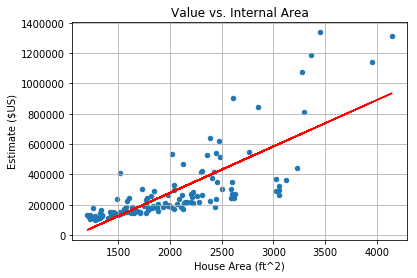

In [47]:
tot.plot(x = "house area", y="estimate", kind = "scatter",grid = True)
plt.title("Value vs. Internal Area")
plt.xlabel("House Area (ft^2)")
plt.ylabel("Estimate ($US)")
b, m = polyfit(tot["house area"], tot["estimate"], 1)
plt.plot(tot["house area"],b + m*tot["house area"],"-",color = "red")
plt.savefig("../data/cleandata/Ben_Slides_Stuff/House_Scatter.png",bbox_inches="tight")

In [35]:
slope, intercept, r_value, p_value, std_err = stats.linregress(tot["house area"],tot["estimate"])
print(r_value)

0.7725745626980605


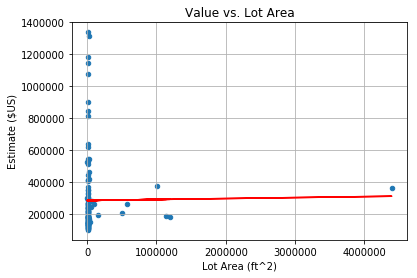

In [48]:
tot.plot(x = "lot area", y="estimate", kind = "scatter",grid = True)
plt.title("Value vs. Lot Area")
plt.xlabel("Lot Area (ft^2)")
plt.ylabel("Estimate ($US)")
b, m = polyfit(tot["lot area"], tot["estimate"], 1)
plt.plot(tot["lot area"],b + m*tot["lot area"],"-",color = "red")
plt.savefig("../data/cleandata/Ben_Slides_Stuff/Lot_Scatter.png",bbox_inches="tight")

In [39]:
slope, intercept, r_value, p_value, std_err = stats.linregress(tot["lot area"],tot["estimate"])
print(r_value)

0.010673193182721835


In [40]:
side = tot.loc[tot["lot area"] <= 25000]

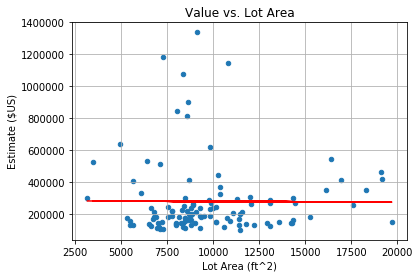

In [49]:
side.plot(x = "lot area", y="estimate", kind = "scatter",grid = True)
plt.title("Value vs. Lot Area")
plt.xlabel("Lot Area (ft^2)")
plt.ylabel("Estimate ($US)")
b, m = polyfit(side["lot area"], side["estimate"], 1)
plt.plot(side["lot area"],b + m*side["lot area"],"-",color = "red")
plt.savefig("../data/cleandata/Ben_Slides_Stuff/Good_Lot_Scatter.png",bbox_inches="tight")

In [42]:
slope, intercept, r_value, p_value, std_err = stats.linregress(side["lot area"],side["estimate"])
print(r_value)

-0.0062283665790014795


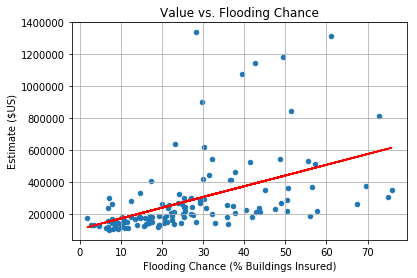

In [50]:
tot.plot(x = "Percent Insured", y="estimate", kind = "scatter",grid = True)
plt.title("Value vs. Flooding Chance")
plt.xlabel("Flooding Chance (% Buildings Insured)")
plt.ylabel("Estimate ($US)")
b, m = polyfit(tot["Percent Insured"], tot["estimate"], 1)
plt.plot(tot["Percent Insured"],b + m*tot["Percent Insured"],"-",color = "red")
plt.savefig("../data/cleandata/Ben_Slides_Stuff/Flood_Scatter.png",bbox_inches="tight")

In [46]:
slope, intercept, r_value, p_value, std_err = stats.linregress(side["Percent Insured"],side["estimate"])
print(r_value)

0.46708603919791974


Below will be heatmaps for the areas.

In [53]:
zip_geojson = requests.get('https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tx_texas_zip_codes_geo.min.json').content
zip_geojson = json.loads(zip_geojson)

In [52]:
def calculate_colors_house(input_list):
    _min = tot["house area"].min()
    _max = tot["house area"].max()
    _range = _max - _min
    
    result = []
    
    for i in input_list:
        norm = (i - _min) / _range
        
        inverse = 1.0 - norm
        mpl_color = Wistia(norm)
        gmaps_color = to_hex(mpl_color, keep_alpha=False)
        
        result.append(gmaps_color)
        
    return result

def calculate_colors_lot(input_list):
    _min = tot["lot area"].min()
    _max = tot["lot area"].max()
    _range = _max - _min
    
    result = []
    
    for i in input_list:
        norm = (i - _min) / _range
        
        inverse = 1.0 - norm
        mpl_color = Wistia(norm)
        gmaps_color = to_hex(mpl_color, keep_alpha=False)
        
        result.append(gmaps_color)
        
    return result

In [56]:
needed_zips = []
needed_zips = list(tot["zip"])

for i in needed_zips:
    i = str(i)

In [57]:
list_index = []

for i in range(len(zip_geojson['features'])):
    if zip_geojson['features'][i]['properties']['ZCTA5CE10'] not in str(needed_zips):
        list_index.append(i)
        
for index in sorted(list_index, reverse=True): 
    del zip_geojson['features'][index]
len(zip_geojson['features'])

127

In [58]:
sort_list = []
for i in range(len(zip_geojson["features"])):
    comp = int(zip_geojson['features'][i]['properties']['ZCTA5CE10'])
    sort_list.extend(tot.loc[tot["zip"] == comp].index)
tot = tot.iloc[sort_list]
tot = tot.reset_index(drop=True)
tot.head()

,zip,estimate,house area,lot area,month value change,LAT,LNG,Locations,Total Buildings,Percent Insured
0,77099,153013.132,1710.190763,7220.537815,611.520000,29.670869,-95.585990,2369,8405,28.185604
1,77389,302047.312,2587.334004,14305.885481,687.627255,30.123469,-95.517064,2001,7853,25.480708
2,77586,306169.674,2505.973948,11979.337398,-761.746000,29.583816,-95.036166,5560,7425,74.882155
3,77020,134260.098,1201.845528,5459.108434,-2146.404810,29.773179,-95.314327,246,7163,3.434315
4,77013,140875.606,1512.776000,11796.918000,989.882000,29.795268,-95.233977,781,3420,22.836257


In [59]:
colors = calculate_colors_house(tot["house area"])

In [60]:
fig = gmaps.figure(map_type = "HYBRID")

gini_layer = gmaps.geojson_layer(
    zip_geojson,
    fill_color=colors,
    stroke_color=colors,
    fill_opacity=0.8)
zip_layer = gmaps.geojson_layer(zip_geojson)

fig.add_layer(zip_layer)
fig.add_layer(gini_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [65]:
colors = calculate_colors_lot(tot["lot area"])

In [66]:
fig = gmaps.figure(map_type = "HYBRID")

gini_layer = gmaps.geojson_layer(
    zip_geojson,
    fill_color=colors,
    stroke_color=colors,
    fill_opacity=0.8)
zip_layer = gmaps.geojson_layer(zip_geojson)

fig.add_layer(zip_layer)
fig.add_layer(gini_layer)
fig

Figure(layout=FigureLayout(height='420px'))